# Introduction to Genetic Algorithms



## Outline of basic GA
1. **Start:** Generate random population of n chromosomes (suitable solutions for the problem)
2. **Fitness:** Evaluate the fitness f(x) of each chromosome x in the population
3. **New population:** Create a new population by repeating the following steps:
    1. **Selection:** Select two parent chromosomes from a population according to their fitness (the better fitness, the bigger chance to be selected)
    2. **Crossover:** With a crossover probability cross over the parents to form a new offspring (children)
    3. **Mutation:** With a mutation probability mutate new offspring at each locus (position in chromosome)
    4. **Accepting:** Place new offspring in a new population
4. **Test:** Evaluate the fitness f(x) of the new population
    1 .If the end condition is satisfied -> stop, and return the best solution in current population
5. **Loop:** Go to the step 3

## How to encode the solution?
Binary encoding
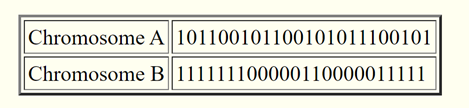 

Permutation
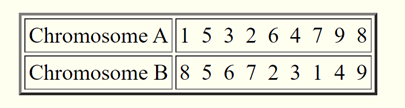

Value encoding
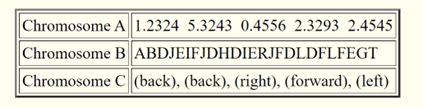 


Crossover and mutation can be performed in different ways

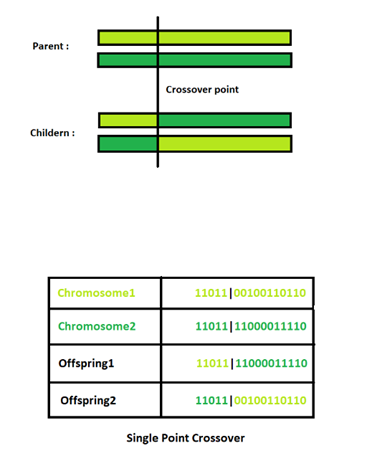 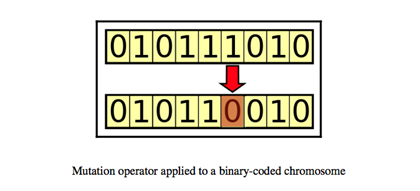

We are going to use the PyGad package.
Make sure that the package is installed and imported.

In [1]:
#%pip install pygad
import pygad
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 

# EXAMPLE 1: One-dimensional function optimization

The asymmetric double claw is difficult to maximize because there are many local solutions.
Standard derivative-based optimizers would simply climb up the hill closest to the starting value.

In [2]:
def f(x): 
    y = (0.46 * (norm.pdf(x, -1, 2/3) + norm.pdf(x, 1, 2/3)) +
          (1/300) * (norm.pdf(x, -0.5, 0.01) + norm.pdf(x, -1, 0.01) +
                       norm.pdf(x, -1.5, 0.01)) +
          (7/300) * (norm.pdf(x, 0.5, 0.07) + norm.pdf(x, 1, 0.07) +
                       norm.pdf(x, 1.5, 0.07)))
  
    return(y)

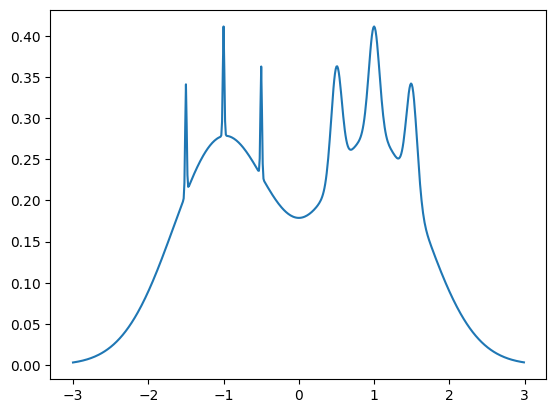

In [3]:
# Plot the double claw
plt.plot(np.arange(-3, 3, 0.01), [f(x) for x in np.arange(-3, 3, 0.01)])

In [4]:
# We can directly use the function definition as a fitness function
def fitness_function(ga_instance, solution, solution_idx):
    return f(solution)[0]   # solution is a numpy array with length 1. We return it as a scalar value

In [5]:
ga_instance = pygad.GA(fitness_func=fitness_function,
                       num_generations=100,                       # number of generations
                       num_parents_mating=10,                     # number of parents selected for mutation/crossover
                       sol_per_pop=20,                            # population size
                       num_genes=1)                               # length of the population vector
ga_instance.run()

C:\Users\Patrik\AppData\Roaming\Python\Python312\site-packages\pygad\pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
C:\Users\Patrik\AppData\Roaming\Python\Python312\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


C:\Users\Patrik\AppData\Roaming\Python\Python312\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


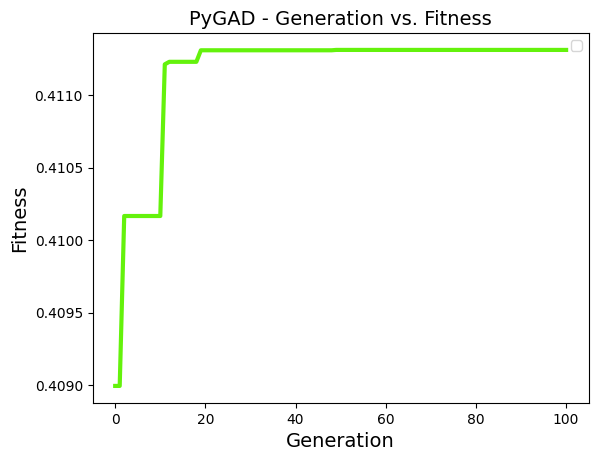

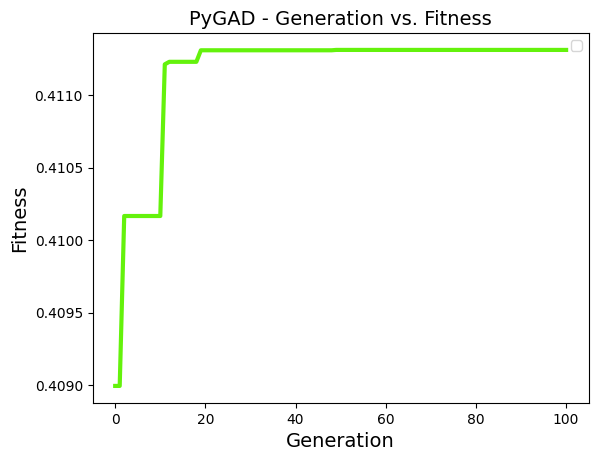

In [6]:
# We can plot the fitness
ga_instance.plot_fitness()

In [7]:
# Or select the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best parameter", solution)
print("Fitness", solution_fitness)
print("Index", solution_idx)

Best parameter [0.99963869]
Fitness 0.41131207270067427
Index 0


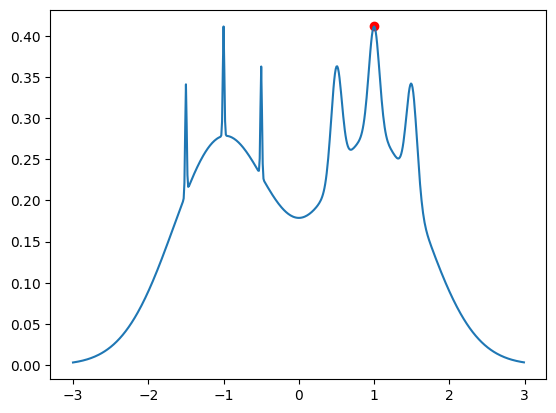

In [8]:
# Plot the best solution
plt.plot(np.arange(-3, 3, 0.01), [f(x) for x in np.arange(-3, 3, 0.01)])
plt.scatter(solution, solution_fitness, color='r')

The evolution of the population units and the corresponding functions values at each generation can be obtained by defining a new monitor function and then passing this function as an optional argument to GA

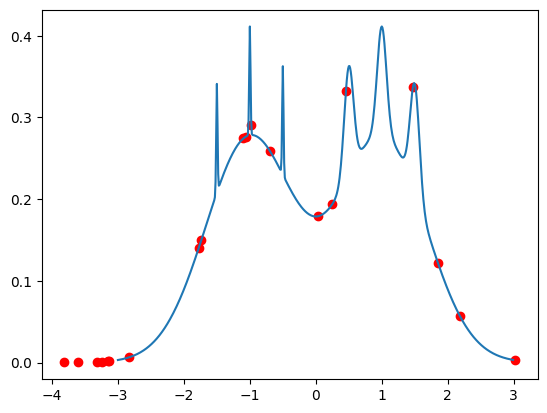

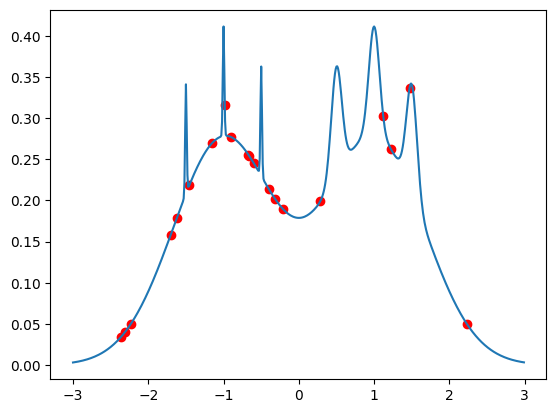

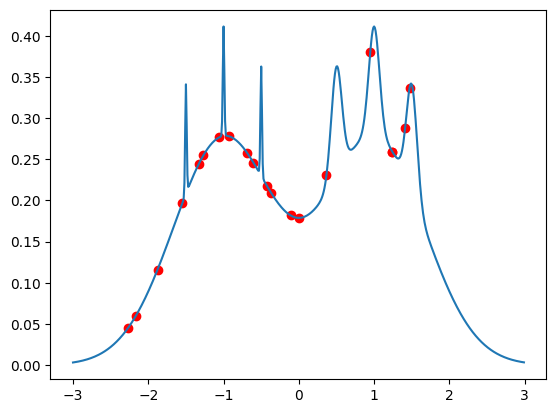

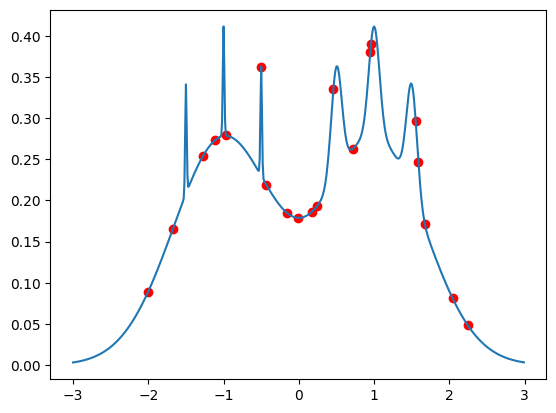

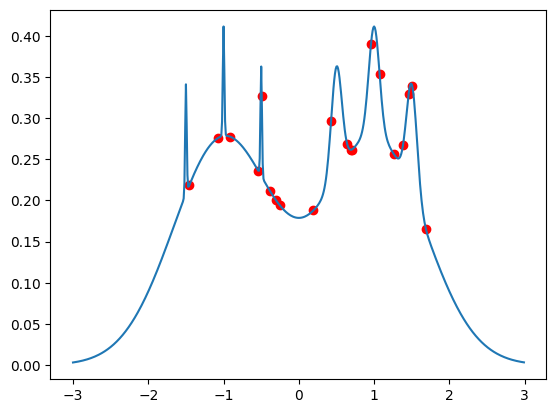

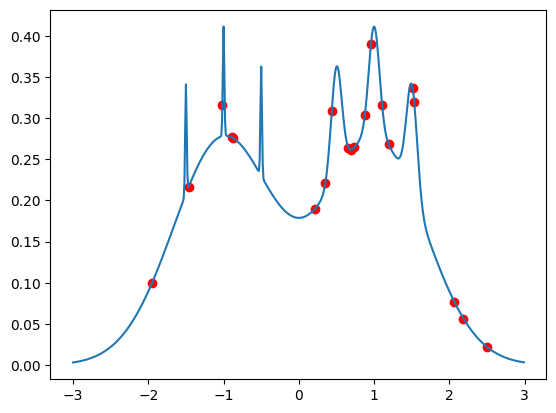

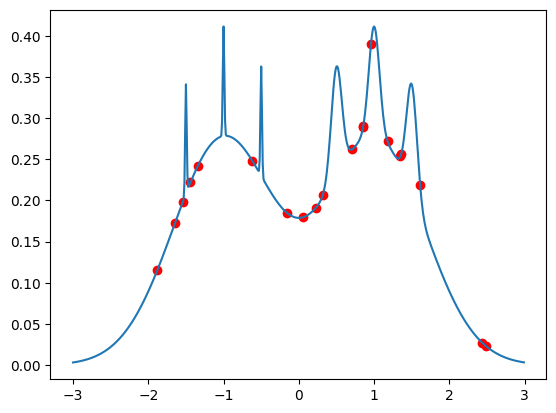

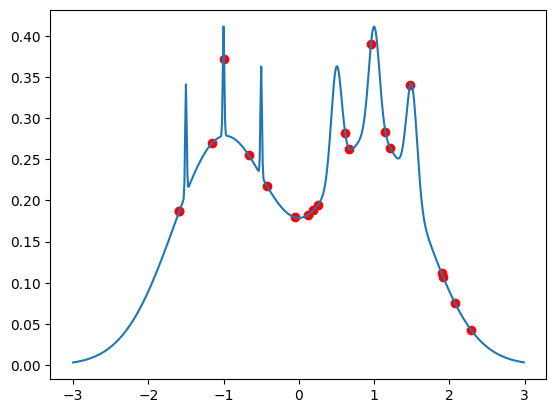

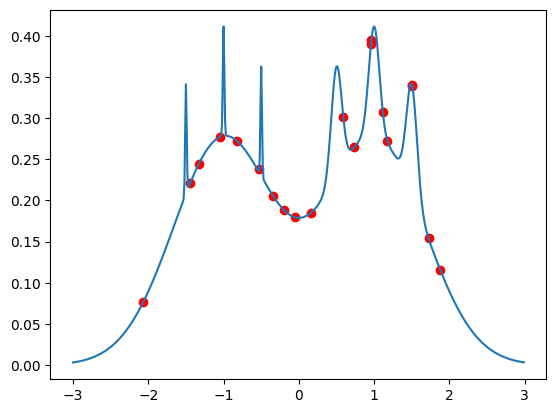

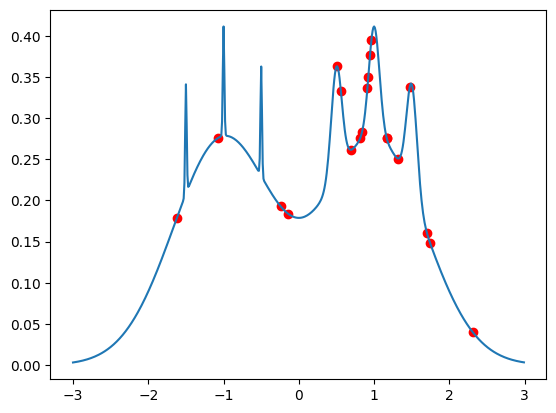

In [9]:
def monitor_func(ga_instance, fitness):
    #print(ga_instance.population)
    plt.plot(np.arange(-3, 3, 0.01), [f(x) for x in np.arange(-3, 3, 0.01)])
    plt.scatter(ga_instance.population, fitness, color='r')
    plt.show()
    
ga_instance = pygad.GA(fitness_func=fitness_function,
                       num_generations=10, 
                       num_parents_mating=10,
                       sol_per_pop=20,
                       num_genes=1,
                       on_fitness = monitor_func)      # Our monitor function, called after each fitness calculation
ga_instance.run()

# EXAMPLE 2: Model fitting

We consider a data on the growth of trees

In [10]:
# The age at which the tree was measured
age = np.array([2.44, 12.44, 22.44, 32.44, 42.44, 52.44, 62.44, 72.44, 82.44, 92.44, 102.44, 112.44])

# The bole volume of the tree
vol = np.array([2.2, 20.0, 93.0, 262.0, 476.0, 705.0, 967.0, 1203.0, 1409.0, 1659.0, 1898.0, 2106.0])

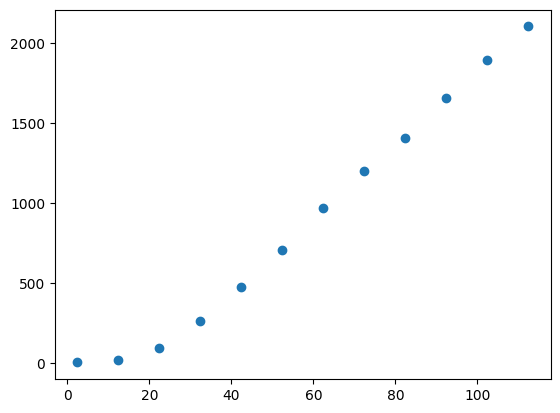

In [11]:
plt.scatter(age, vol)

An ecological model for the plant size (measured by volume) as a function of age is the curve:
f(x) = a*(1-exp(-b*x))^c, where a, b, in c are the model parameters

$$ f(x) = a (1-e^{-bx})^c $$


Let's fit the Richards curve using genetic algorithms

In [12]:
# We first define our model function (argument params represents a vector of the parameters a, b, and c) 
def model(params):
    return params[0] * (1 - np.exp(- params[1] * age))**params[2]

In [13]:
# We define the fitness function as the sum of squares of the differences between estimated and observed data
def myFitness2(ga_instance, solution, solution_idx): 
    return -np.sum((vol - model(solution))**2)

In [14]:
# We restrict the search interval for a,b, and c to [1000.0, 5000.0], [0.0, 5.0], and [0.0, 5.0], respectively.
gene_space = [{'low': 1000, 'high': 5000}, {'low': 0, 'high': 5}, {'low': 0, 'high': 5}]

In [15]:
ga_instance = pygad.GA(fitness_func=myFitness2,
                       num_generations=500, 
                       num_parents_mating=10,
                       sol_per_pop=1000,
                       num_genes=3,                   # Each solution should have 3 genes
                       stop_criteria= "saturate_10",   # Stop if fitness does not change for 7 iterations
                       crossover_type="uniform",      # We can select different crossover/mutation types
                       gene_space=gene_space          # Use the gene space defined earlier
                      )

ga_instance.run()


In [16]:
ga_instance.best_solution()

(array([2.56929065e+03, 2.65144108e-02, 4.57913122e+00]),
 np.float64(-23398.39781060696),
 np.int64(0))

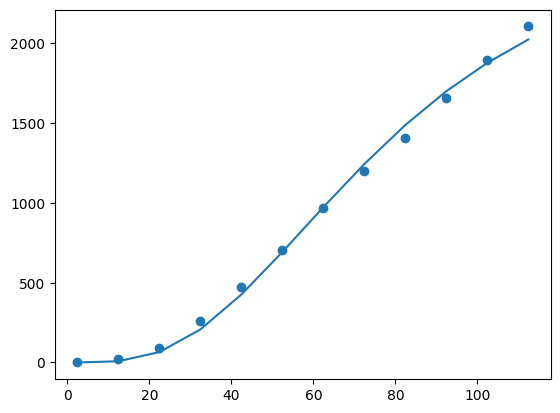

In [17]:
# Lets plot our solution
plt.scatter(age, vol)
plt.plot(age, model(ga_instance.best_solution()[0]))

In [18]:
# we can use a monitor function to plot the current solution
def monitor_func2(ga_instance, fitness): 
    plt.scatter(age, vol)
    plt.plot(age, model(ga_instance.best_solution()[0]))
    plt.show()



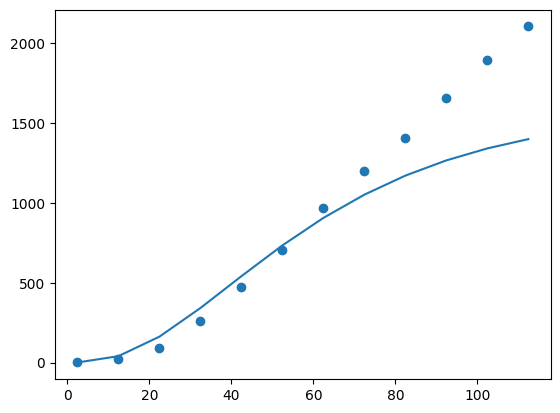

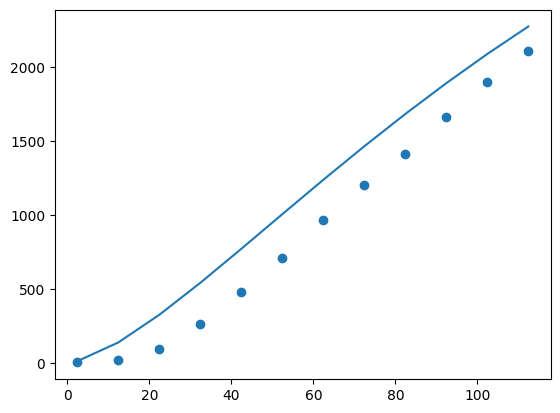

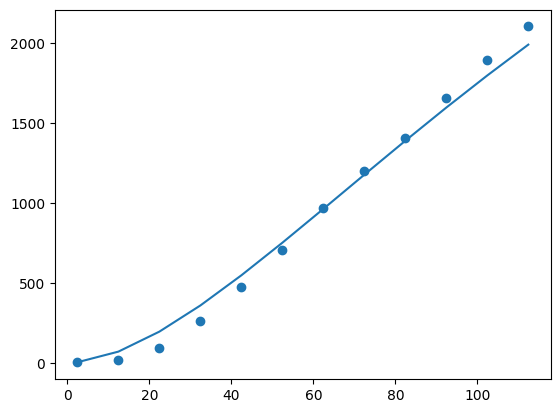

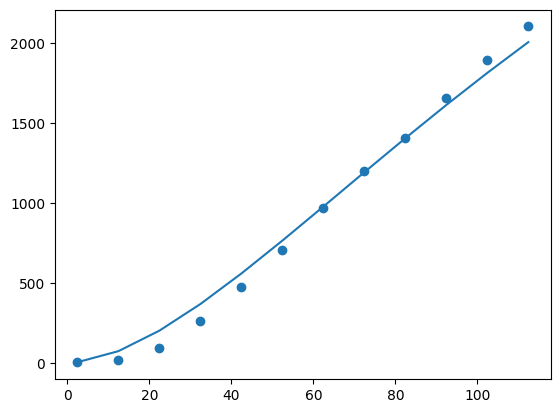

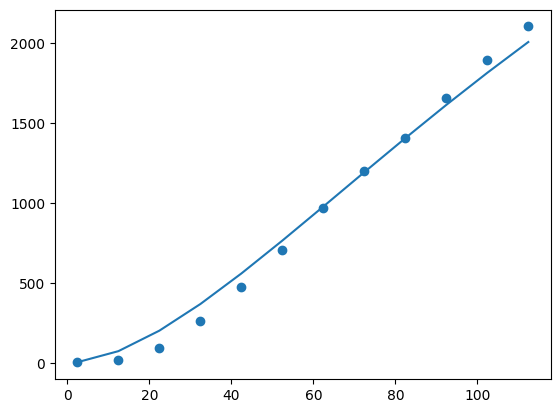

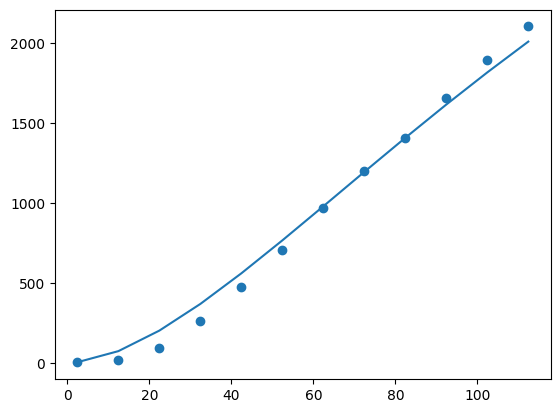

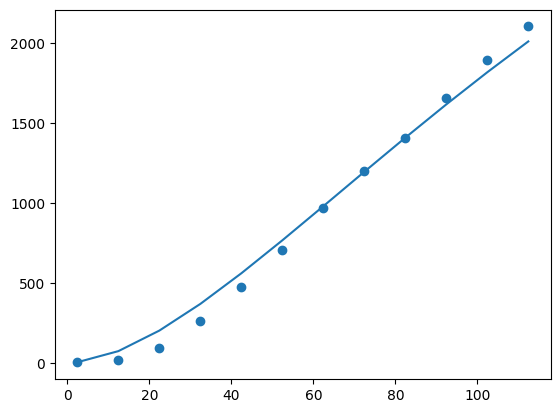

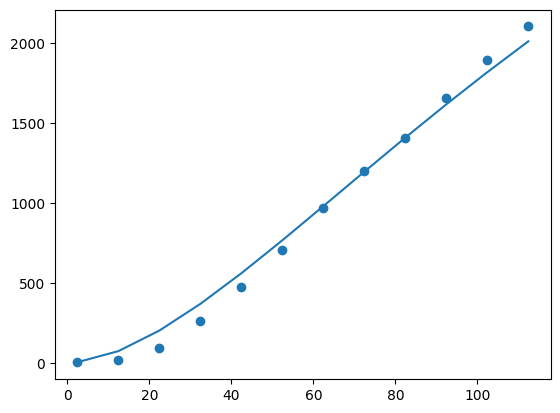

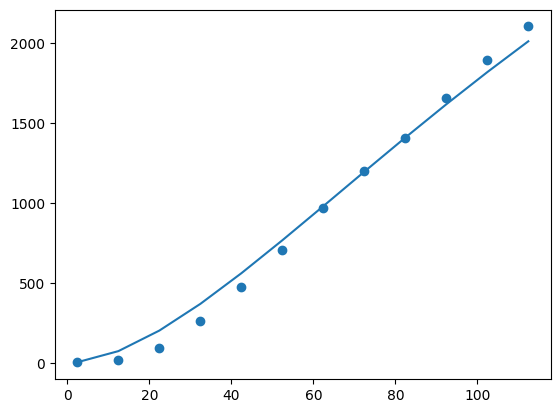

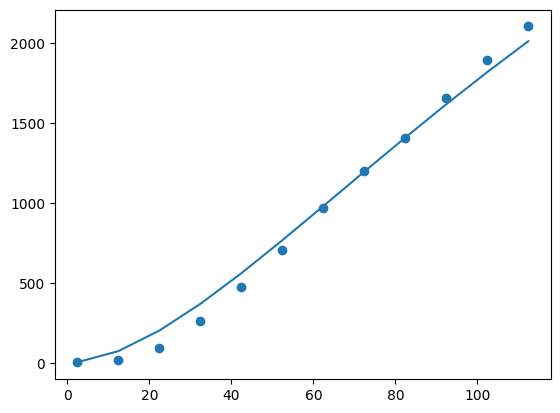

In [19]:
ga_instance = pygad.GA(fitness_func=myFitness2,
                       num_generations=10, 
                       num_parents_mating=10,
                       sol_per_pop=1000,
                       num_genes=3,
                       crossover_type="uniform",
                       gene_space=gene_space,
                       on_fitness=monitor_func2
                      )

ga_instance.run()

# EXAMPLE 3: The Knapsack problem

The Knapsack problem is defined as follows: given a set of items, each with a mass and a value, determine the subset of items to be included in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.

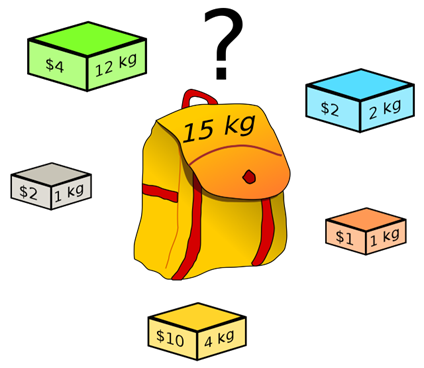

In [20]:
# a vector of the items' values
values = [5, 8, 3, 4, 6, 5, 4, 3, 2]

# a vector of the item's weights
weights = [1, 3, 2, 4, 2, 1, 3, 4, 5]

# the knapsack capacity
Capacity = 10

A binary GA can be used to solve the knapsack problem. The solution to this problem is a binary string equal to the number of items where the ith bit is 1 if the ith item is in the subset and 0 otherwise. The fitness function should penalize unfeasible solutions.

In [21]:
def knapsack(ga_instance, solution, solution_idx):

    f = sum(solution * values)
    w = sum(solution * weights)

    if (w > Capacity):
        f = Capacity - w
        
    return(f)

In [31]:
# Limit the genes to either 0 or 1 
gene_space = {'low': 0, 'high': 1}

In [23]:
ga_instance = pygad.GA(fitness_func=knapsack,
                       num_generations=10000, 
                       num_parents_mating=10,
                       sol_per_pop=1000,
                       stop_criteria= "saturate_50",
                       num_genes=len(weights),
                       gene_space=gene_space,
                      )

ga_instance.run()

ga_instance.best_solution()

(array([9.99573378e-01, 9.99869548e-01, 9.90353284e-01, 2.48362009e-03,
        9.99761619e-01, 9.98788867e-01, 3.35402796e-01, 1.10241509e-03,
        2.09807659e-04]),
 np.float64(28.315669697145196),
 np.int64(0))

# EXAMPLE 4: Traveling salesman problem

Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

In [24]:
import pandas as pd

cities = pd.read_csv('https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/eurodist.csv')
cities

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,Cologne,2762,1498,206,409,785,0,760,1662,2436,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,Geneva,2610,803,677,747,853,1662,1418,0,1975,...,1936,158,1439,425,328,591,513,995,2068,1019
8,Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,Hamburg,2977,2018,597,714,1115,460,460,1118,2897,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [25]:
# Remove the column with city names, preserve only the values
cities = cities.drop('city', axis=1)

In [26]:
def tourLength(pygad_instance, tour, solution_index):

    N = len(tour)
  
    dist = 0
    for i in range(1,N): 
        dist = dist + cities.iloc[tour[i-1],tour[i]]
  
    dist = dist + cities.iloc[tour[N-1],tour[1]]
    return -dist


In [27]:
ga_instance = pygad.GA(fitness_func=tourLength,
                       num_generations=5000, 
                       num_parents_mating=200,
                       sol_per_pop=1000,
                       num_genes=len(cities),
                       init_range_low=0,                       # The lowest possible number should be 1
                       init_range_high=len(cities),            # The highest possible number should be len(cities)-1
                       gene_type=int,                          # The solution should only contain integers
                       mutation_type='swap',                   # Mutation should swap numbers in the solution
                       allow_duplicate_genes=False,            # For permutation, each gene should be unique - no duplicates
                       crossover_probability=0,                # Ignore crossover to avoid issues with duplicate genes
                       stop_criteria="saturate_15" 
                      )

ga_instance.run()

C:\Users\Patrik\AppData\Roaming\Python\Python312\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [28]:
ga_instance.best_solution()

(array([17,  3, 14, 11,  8, 13,  7,  1, 12, 16,  9, 19,  2,  4, 18,  0, 20,
        15,  5,  6, 10]),
 np.int64(-19809),
 np.int64(0))

In [29]:
cities.iloc[:,ga_instance.best_solution()[0]].columns

Index(['Paris', 'Calais', 'Marseilles', 'Lisbon', 'Gibraltar', 'Madrid',
       'Geneva', 'Barcelona', 'Lyons', 'Munich', 'Hamburg', 'Stockholm',
       'Brussels', 'Cherbourg', 'Rome', 'Athens', 'Vienna', 'Milan', 'Cologne',
       'Copenhagen', 'Hook of Holland'],
      dtype='object')